#📌 Extracão

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
import pandas as pd
import requests

# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carregar os dados da API diretamente para um DataFrame do Pandas
try:
    df_telecom = pd.read_json(url)
    print("Dados carregados com sucesso!")
    print("\nPrimeiras 5 linhas do DataFrame:")
    print(df_telecom.head())
    print(f"\nO DataFrame possui {df_telecom.shape[0]} linhas e {df_telecom.shape[1]} colunas.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar os dados: {e}")

Dados carregados com sucesso!

Primeiras 5 linhas do DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...  

In [86]:
# Exibir os nomes das colunas do DataFrame
print("Nomes das colunas do DataFrame:")
print(df_telecom.columns)

Nomes das colunas do DataFrame:
Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


#🔧 Transformação

In [87]:
import pandas as pd
import requests

# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carrega os dados da API
df_telecom = pd.read_json(url)

# --- Normalização das colunas aninhadas ---
# Normaliza a coluna 'customer'
df_customer = pd.json_normalize(df_telecom['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns] # Renomear para evitar conflito

# Normaliza a coluna 'phone'
df_phone = pd.json_normalize(df_telecom['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns]

# Normaliza a coluna 'internet'
df_internet = pd.json_normalize(df_telecom['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns]

# Normaliza a coluna 'account'
df_account = pd.json_normalize(df_telecom['account'])
df_account.columns = ['account_' + col for col in df_account.columns]

# Combinar os DataFrames normalizados com o DataFrame original (excluindo as colunas aninhadas originais)
df_telecom_flat = pd.concat([
    df_telecom[['customerID', 'Churn']], # Manter customerID e Churn
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

print("DataFrame após normalização das colunas aninhadas:")
print(df_telecom_flat.head())

print("\n--- Informações sobre as colunas e tipos de dados ---")
df_telecom_flat.info()

print("\n--- Verificação de valores nulos ---")
print(df_telecom_flat.isnull().sum())

DataFrame após normalização das colunas aninhadas:
   customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes      

In [88]:
import pandas as pd
import requests
import numpy as np # Importar numpy para lidar com NaN

# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carrega os dados da API
df_telecom = pd.read_json(url)

# --- Normalização das colunas aninhadas (reproduzindo o passo anterior) ---
df_customer = pd.json_normalize(df_telecom['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns]

df_phone = pd.json_normalize(df_telecom['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns]

df_internet = pd.json_normalize(df_telecom['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns]

df_account = pd.json_normalize(df_telecom['account'])
df_account.columns = ['account_' + col for col in df_account.columns]

df_telecom_flat = pd.concat([
    df_telecom[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

print("DataFrame carregado e normalizado com sucesso para a validação.")
print("-" * 50)

# --- 1. Verificação de Valores Ausentes (NaN) ---
print("\n--- 1. Verificando Valores Ausentes (NaN) por Coluna ---")
missing_values = df_telecom_flat.isnull().sum()
print(missing_values[missing_values > 0]) # Exibe apenas as colunas com valores ausentes

if missing_values.sum() == 0:
    print("Nenhum valor ausente encontrado no DataFrame.")
else:
    print("\nÉ necessário tratar os valores ausentes nas colunas listadas acima.")

print("-" * 50)

# --- 2. Verificação de Registros Duplicados ---
print("\n--- 2. Verificando Registros Duplicados ---")
duplicated_rows = df_telecom_flat.duplicated().sum()
print(f"Total de linhas duplicadas: {duplicated_rows}")

if duplicated_rows > 0:
    print("Há linhas duplicadas no DataFrame. Considere removê-las.")
else:
    print("Nenhuma linha duplicada encontrada no DataFrame.")

print("-" * 50)

# --- 3. Verificação de Erros de Formatação e Inconsistências de Tipos de Dados ---
print("\n--- 3. Verificando Erros de Formatação e Tipos de Dados ---")
print("Tipos de dados atuais:")
df_telecom_flat.info() # Usar .info() que já é robusto e retorna None

# Tratamento da coluna 'account_Charges.Total'
print("\nVerificando a coluna 'account_Charges.Total'...")
# Primeiro, identifica os valores que não são numéricos se a coluna for do tipo 'object'
if df_telecom_flat['account_Charges.Total'].dtype == 'object':
    non_numeric_total_charges = df_telecom_flat[pd.to_numeric(df_telecom_flat['account_Charges.Total'], errors='coerce').isna()]
    print(f"Valores não numéricos em 'account_Charges.Total' (incluindo strings vazias/espaços):")
    print(non_numeric_total_charges[['customerID', 'account_Charges.Total']])

    # Converter para numérico, tratando erros como NaN
    df_telecom_flat['account_Charges.Total'] = pd.to_numeric(df_telecom_flat['account_Charges.Total'], errors='coerce')
    print("\n'account_Charges.Total' convertida para tipo numérico. Valores não numéricos se tornaram NaN.")

    # Verifica novos NaNs após a conversão
    new_missing_total_charges = df_telecom_flat['account_Charges.Total'].isnull().sum()
    if new_missing_total_charges > 0:
        print(f"Total de novos valores ausentes em 'account_Charges.Total' após conversão: {new_missing_total_charges}")
        df_telecom_flat['account_Charges.Total'] = df_telecom_flat['account_Charges.Total'].fillna(0)
        print("'account_Charges.Total' preenchida com 0 para os valores NaN resultantes da conversão.")

print("\nVerificando a coluna 'account_Charges.Monthly'...")
# Verifica e garante que 'account_Charges.Monthly' é numérico
if df_telecom_flat['account_Charges.Monthly'].dtype == 'object':
    print("A coluna 'account_Charges.Monthly' é do tipo 'object'. Convertendo para numérico...")
    df_telecom_flat['account_Charges.Monthly'] = pd.to_numeric(df_telecom_flat['account_Charges.Monthly'], errors='coerce')
    if df_telecom_flat['account_Charges.Monthly'].isnull().sum() > 0:
        print("Atenção: Valores NaN foram introduzidos em 'account_Charges.Monthly' durante a conversão. Verifique.")
    else:
        print("'account_Charges.Monthly' convertida para numérico com sucesso.")
elif not pd.api.types.is_numeric_dtype(df_telecom_flat['account_Charges.Monthly']):
    print(f"A coluna 'account_Charges.Monthly' não é numérica ({df_telecom_flat['account_Charges.Monthly'].dtype}). Verifique.")
else:
    print("'account_Charges.Monthly' já é numérica.")


# --- 4. Verificação de Inconsistências nas Categorias ---
print("\n--- 4. Verificando Inconsistências em Colunas Categóricas ---")

# Colunas categóricas para verificar unicidade de valores
categorical_cols = [
    'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner',
    'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines',
    'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling',
    'account_PaymentMethod'
]

for col in categorical_cols:
    if col in df_telecom_flat.columns:
        print(f"\nColuna '{col}': {df_telecom_flat[col].unique()}")
    else:
        print(f"Aviso: Coluna '{col}' não encontrada no DataFrame após normalização.")

# Padronizando Churn para 0 e 1 (se ainda não for numérico)
if df_telecom_flat['Churn'].dtype == 'object':
    df_telecom_flat['Churn'] = df_telecom_flat['Churn'].map({'Yes': 1, 'No': 0})
    print("\nColuna 'Churn' padronizada para 1 (Yes) e 0 (No).")
    print(f"Novos valores únicos de 'Churn': {df_telecom_flat['Churn'].unique()}")

print("-" * 50)
print("\nValidação e limpeza inicial concluída.")
print("Novos tipos de dados após tratamento:")
df_telecom_flat.info()

DataFrame carregado e normalizado com sucesso para a validação.
--------------------------------------------------

--- 1. Verificando Valores Ausentes (NaN) por Coluna ---
Series([], dtype: int64)
Nenhum valor ausente encontrado no DataFrame.
--------------------------------------------------

--- 2. Verificando Registros Duplicados ---
Total de linhas duplicadas: 0
Nenhuma linha duplicada encontrada no DataFrame.
--------------------------------------------------

--- 3. Verificando Erros de Formatação e Tipos de Dados ---
Tipos de dados atuais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4 

In [89]:
import pandas as pd
import requests
import numpy as np

# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carrega os dados da API
df_telecom = pd.read_json(url)

# --- Normalização das colunas aninhadas (reproduzindo o passo anterior) ---
df_customer = pd.json_normalize(df_telecom['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns]

df_phone = pd.json_normalize(df_telecom['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns]

df_internet = pd.json_normalize(df_telecom['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns]

df_account = pd.json_normalize(df_telecom['account'])
df_account.columns = ['account_' + col for col in df_account.columns]

df_telecom_flat = pd.concat([
    df_telecom[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Tratamento de 'account_Charges.Total' e 'account_Charges.Monthly'
# para garantir que estejam numéricos e NaNs tratados (do passo anterior)
df_telecom_flat['account_Charges.Total'] = pd.to_numeric(df_telecom_flat['account_Charges.Total'], errors='coerce')
df_telecom_flat['account_Charges.Total'] = df_telecom_flat['account_Charges.Total'].fillna(0)
df_telecom_flat['account_Charges.Monthly'] = pd.to_numeric(df_telecom_flat['account_Charges.Monthly'], errors='coerce')

# Padronizando Churn para 1 (Yes) e 0 (No)
df_telecom_flat['Churn'] = df_telecom_flat['Churn'].map({'Yes': 1, 'No': 0})
print(f"Número de linhas antes de remover NaNs em 'Churn': {len(df_telecom_flat)}")
df_telecom_flat = df_telecom_flat.dropna(subset=['Churn'])
print(f"Número de linhas após remover NaNs em 'Churn': {len(df_telecom_flat)}")
print(f"Valores únicos da coluna 'Churn' após remoção de NaNs: {df_telecom_flat['Churn'].unique()}")

Número de linhas antes de remover NaNs em 'Churn': 7267
Número de linhas após remover NaNs em 'Churn': 7043
Valores únicos da coluna 'Churn' após remoção de NaNs: [0. 1.]


In [90]:
# Colunas que podem ser mapeadas diretamente para 0 e 1 (ou 0, 1, 2 para 'No internet service')
binary_map_cols = {
    'customer_Partner': {'Yes': 1, 'No': 0},
    'customer_Dependents': {'Yes': 1, 'No': 0},
    'phone_PhoneService': {'Yes': 1, 'No': 0},
    'phone_MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0}, # 'No phone service' tratado como 'No'
    'account_PaperlessBilling': {'Yes': 1, 'No': 0}
}

# Mapea colunas de serviço de internet (considerando 'No internet service' como 'No')
internet_service_map_cols = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]
internet_mapping = {'Yes': 1, 'No': 0, 'No internet service': 0} # 'No internet service' tratado como 'No'

for col, mapping in binary_map_cols.items():
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(mapping)

for col in internet_service_map_cols:
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(internet_mapping)

# Mapeamento especial para 'customer_gender'
df_telecom_flat['customer_gender'] = df_telecom_flat['customer_gender'].map({'Female': 1, 'Male': 0})

print("\nColunas binárias e de serviço de internet mapeadas para 0 e 1.")


Colunas binárias e de serviço de internet mapeadas para 0 e 1.


In [91]:
# Colunas para aplicar One-Hot Encoding
ohe_cols = [
    'internet_InternetService', # DSL, Fiber optic, No
    'account_Contract',         # Month-to-month, One year, Two year
    'account_PaymentMethod'     # Mailed check, Electronic check, Credit card (automatic), Bank transfer (automatic)
]

print("\nAplicando One-Hot Encoding nas colunas:")
print(ohe_cols)

# Aplicar One-Hot Encoding
df_telecom_flat = pd.get_dummies(df_telecom_flat, columns=ohe_cols, dtype=int) # dtype=int para ter 0s e 1s inteiros

print("\nDataFrame após One-Hot Encoding (primeiras 5 linhas):")
print(df_telecom_flat.head())


Aplicando One-Hot Encoding nas colunas:
['internet_InternetService', 'account_Contract', 'account_PaymentMethod']

DataFrame após One-Hot Encoding (primeiras 5 linhas):
   customerID  Churn  customer_gender  customer_SeniorCitizen  \
0  0002-ORFBO    0.0                1                       0   
1  0003-MKNFE    0.0                0                       0   
2  0004-TLHLJ    1.0                0                       0   
3  0011-IGKFF    1.0                0                       1   
4  0013-EXCHZ    1.0                1                       1   

   customer_Partner  customer_Dependents  customer_tenure  phone_PhoneService  \
0                 1                    1                9                   1   
1                 0                    0                9                   1   
2                 0                    0                4                   1   
3                 1                    0               13                   1   
4                 1               

In [92]:
import pandas as pd
import numpy as np

# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carrega os dados da API
df_telecom = pd.read_json(url)

# --- Normalização das colunas aninhadas ---
df_customer = pd.json_normalize(df_telecom['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns]

df_phone = pd.json_normalize(df_telecom['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns]

df_internet = pd.json_normalize(df_telecom['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns]

df_account = pd.json_normalize(df_telecom['account'])
df_account.columns = ['account_' + col for col in df_account.columns]

df_telecom_flat = pd.concat([
    df_telecom[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Tratamento de 'account_Charges.Total' e 'account_Charges.Monthly'
df_telecom_flat['account_Charges.Total'] = pd.to_numeric(df_telecom_flat['account_Charges.Total'], errors='coerce')
df_telecom_flat['account_Charges.Total'] = df_telecom_flat['account_Charges.Total'].fillna(0)
df_telecom_flat['account_Charges.Monthly'] = pd.to_numeric(df_telecom_flat['account_Charges.Monthly'], errors='coerce')

# Padronizando Churn
df_telecom_flat['Churn'] = df_telecom_flat['Churn'].map({'Yes': 1, 'No': 0})
df_telecom_flat = df_telecom_flat.dropna(subset=['Churn'])


# Mapeamento de colunas binárias e de serviço de internet
binary_map_cols = {
    'customer_Partner': {'Yes': 1, 'No': 0},
    'customer_Dependents': {'Yes': 1, 'No': 0},
    'phone_PhoneService': {'Yes': 1, 'No': 0},
    'phone_MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'account_PaperlessBilling': {'Yes': 1, 'No': 0}
}
internet_service_map_cols = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]
internet_mapping = {'Yes': 1, 'No': 0, 'No internet service': 0}

for col, mapping in binary_map_cols.items():
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(mapping)

for col in internet_service_map_cols:
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(internet_mapping)

# Atribuição direta também para 'customer_gender'
df_telecom_flat['customer_gender'] = df_telecom_flat['customer_gender'].map({'Female': 1, 'Male': 0})

# One-Hot Encoding
ohe_cols = [
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]
df_telecom_flat = pd.get_dummies(df_telecom_flat, columns=ohe_cols, dtype=int)


# --- Criação da nova coluna "Contas_Diarias" ---
# Média de dias em um mês (365 dias em um ano / 12 meses)
dias_no_mes = 365.25 / 12

df_telecom_flat['Contas_Diarias'] = df_telecom_flat['account_Charges.Monthly'] / dias_no_mes

print("Coluna 'Contas_Diarias' criada com sucesso!")
print("\nPrimeiras 5 linhas do DataFrame com a nova coluna:")
print(df_telecom_flat[['account_Charges.Monthly', 'Contas_Diarias']].head())
print(f"\nO DataFrame agora possui {df_telecom_flat.shape[1]} colunas.")

Coluna 'Contas_Diarias' criada com sucesso!

Primeiras 5 linhas do DataFrame com a nova coluna:
   account_Charges.Monthly  Contas_Diarias
0                     65.6        2.155236
1                     59.9        1.967967
2                     73.9        2.427926
3                     98.0        3.219713
4                     83.9        2.756468

O DataFrame agora possui 29 colunas.


#📊 Carga e análise

In [93]:
import pandas as pd
import numpy as np

# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carrega os dados da API
df_telecom = pd.read_json(url)

# --- Normalização das colunas aninhadas ---
df_customer = pd.json_normalize(df_telecom['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns]

df_phone = pd.json_normalize(df_telecom['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns]

df_internet = pd.json_normalize(df_telecom['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns]

df_account = pd.json_normalize(df_telecom['account'])
df_account.columns = ['account_' + col for col in df_account.columns]

df_telecom_flat = pd.concat([
    df_telecom[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Tratamento de 'account_Charges.Total' e 'account_Charges.Monthly'
df_telecom_flat['account_Charges.Total'] = pd.to_numeric(df_telecom_flat['account_Charges.Total'], errors='coerce')
df_telecom_flat['account_Charges.Total'] = df_telecom_flat['account_Charges.Total'].fillna(0)
df_telecom_flat['account_Charges.Monthly'] = pd.to_numeric(df_telecom_flat['account_Charges.Monthly'], errors='coerce')

# Padronizando Churn
df_telecom_flat['Churn'] = df_telecom_flat['Churn'].map({'Yes': 1, 'No': 0})
df_telecom_flat = df_telecom_flat.dropna(subset=['Churn'])

# Mapeamento de colunas binárias e de serviço de internet
binary_map_cols = {
    'customer_Partner': {'Yes': 1, 'No': 0},
    'customer_Dependents': {'Yes': 1, 'No': 0},
    'phone_PhoneService': {'Yes': 1, 'No': 0},
    'phone_MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'account_PaperlessBilling': {'Yes': 1, 'No': 0}
}
internet_service_map_cols = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]
internet_mapping = {'Yes': 1, 'No': 0, 'No internet service': 0}

for col, mapping in binary_map_cols.items():
    if col in df_telecom_flat.columns:
        # Atribuição explícita para evitar warnings e garantir modificação no DataFrame
        df_telecom_flat[col] = df_telecom_flat[col].map(mapping)

for col in internet_service_map_cols:
    if col in df_telecom_flat.columns:
        # Atribuição explícita para evitar warnings e garantir modificação no DataFrame
        df_telecom_flat[col] = df_telecom_flat[col].map(internet_mapping)

# Atribuição explícita também para 'customer_gender'
df_telecom_flat['customer_gender'] = df_telecom_flat['customer_gender'].map({'Female': 1, 'Male': 0}) # Female=1, Male=0

# One-Hot Encoding
ohe_cols = [
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]
df_telecom_flat = pd.get_dummies(df_telecom_flat, columns=ohe_cols, dtype=int)

# Criação da nova coluna "Contas_Diarias"
dias_no_mes = 365.25 / 12
df_telecom_flat['Contas_Diarias'] = df_telecom_flat['account_Charges.Monthly'] / dias_no_mes

print("--- Análise Descritiva para Variáveis Numéricas ---")
print(df_telecom_flat.describe())

print("\n--- Análise Descritiva para Variáveis Categóricas (Contagem de Valores) ---")

# Colunas que são binárias ou categóricas discretas após o pré-processamento
categorical_summary_cols = [
    'Churn',
    'customer_gender',
    'customer_SeniorCitizen',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling',
    # As colunas One-Hot Encoded também são categóricas (binárias), podemos verificar suas médias para proporção
    'internet_InternetService_DSL',
    'internet_InternetService_Fiber optic',
    'internet_InternetService_No',
    'account_Contract_Month-to-month',
    'account_Contract_One year',
    'account_Contract_Two year',
    'account_PaymentMethod_Bank transfer (automatic)',
    'account_PaymentMethod_Credit card (automatic)',
    'account_PaymentMethod_Electronic check',
    'account_PaymentMethod_Mailed check'
]

for col in categorical_summary_cols:
    if col in df_telecom_flat.columns:
        print(f"\n--- Coluna: {col} ---")
        # Para variáveis binárias (0/1), a média é a proporção de 1s
        if df_telecom_flat[col].nunique() <= 2: # Se tem 2 ou menos valores únicos (0, 1, ou talvez só 0 ou só 1)
            print(df_telecom_flat[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
        else: # Para outras categóricas (embora já tenhamos one-hot encoded muitas)
            print(df_telecom_flat[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
    else:
        print(f"\nAVISO: Coluna '{col}' não encontrada após o processamento. Verifique se o nome está correto ou se foi transformada.")

--- Análise Descritiva para Variáveis Numéricas ---
             Churn  customer_gender  customer_SeniorCitizen  customer_Partner  \
count  7043.000000      7043.000000             7043.000000       7043.000000   
mean      0.265370         0.495244                0.162147          0.483033   
std       0.441561         0.500013                0.368612          0.499748   
min       0.000000         0.000000                0.000000          0.000000   
25%       0.000000         0.000000                0.000000          0.000000   
50%       0.000000         0.000000                0.000000          0.000000   
75%       1.000000         1.000000                0.000000          1.000000   
max       1.000000         1.000000                1.000000          1.000000   

       customer_Dependents  customer_tenure  phone_PhoneService  \
count          7043.000000      7043.000000         7043.000000   
mean              0.299588        32.371149            0.903166   
std              

DataFrame pronto para visualização do Churn.
--------------------------------------------------


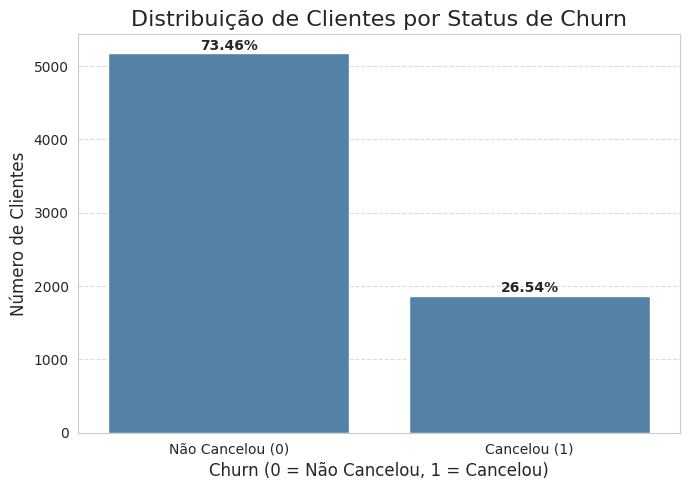


Proporção de Clientes por Status de Churn:
Não Cancelou (0): 73.46%
Cancelou (1): 26.54%


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carrega os dados da API
df_telecom = pd.read_json(url)

# --- Normalização das colunas aninhadas ---
df_customer = pd.json_normalize(df_telecom['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns]

df_phone = pd.json_normalize(df_telecom['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns]

df_internet = pd.json_normalize(df_telecom['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns]

df_account = pd.json_normalize(df_telecom['account'])
df_account.columns = ['account_' + col for col in df_account.columns]

df_telecom_flat = pd.concat([
    df_telecom[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Tratamento de 'account_Charges.Total' e 'account_Charges.Monthly'
df_telecom_flat['account_Charges.Total'] = pd.to_numeric(df_telecom_flat['account_Charges.Total'], errors='coerce')
df_telecom_flat['account_Charges.Total'] = df_telecom_flat['account_Charges.Total'].fillna(0)
df_telecom_flat['account_Charges.Monthly'] = pd.to_numeric(df_telecom_flat['account_Charges.Monthly'], errors='coerce')

# Padronizando Churn
df_telecom_flat['Churn'] = df_telecom_flat['Churn'].map({'Yes': 1, 'No': 0})
df_telecom_flat.dropna(subset=['Churn'], inplace=True)

# Mapeamento de colunas binárias e de serviço de internet
binary_map_cols = {
    'customer_Partner': {'Yes': 1, 'No': 0},
    'customer_Dependents': {'Yes': 1, 'No': 0},
    'phone_PhoneService': {'Yes': 1, 'No': 0},
    'phone_MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'account_PaperlessBilling': {'Yes': 1, 'No': 0}
}
internet_service_map_cols = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]
internet_mapping = {'Yes': 1, 'No': 0, 'No internet service': 0}

for col, mapping in binary_map_cols.items():
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(mapping)

for col in internet_service_map_cols:
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(internet_mapping)

df_telecom_flat['customer_gender'] = df_telecom_flat['customer_gender'].map({'Female': 1, 'Male': 0}) # Female=1, Male=0

# One-Hot Encoding
ohe_cols = [
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]
df_telecom_flat = pd.get_dummies(df_telecom_flat, columns=ohe_cols, dtype=int)

# Criação da nova coluna "Contas_Diarias"
dias_no_mes = 365.25 / 12
df_telecom_flat['Contas_Diarias'] = df_telecom_flat['account_Charges.Monthly'] / dias_no_mes

print("DataFrame pronto para visualização do Churn.")
print("-" * 50)

# --- Visualização da Distribuição de Churn ---

plt.figure(figsize=(7, 5))
sns.countplot(data=df_telecom_flat, x='Churn', color='steelblue') # Usando 'color' em vez de 'palette'
plt.title('Distribuição de Clientes por Status de Churn', fontsize=16)
plt.xlabel('Churn (0 = Não Cancelou, 1 = Cancelou)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks([0, 1], ['Não Cancelou (0)', 'Cancelou (1)'])

# Adiciona os valores percentuais nas barras
total = float(len(df_telecom_flat))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2.,
                height + 50,  # Ajuste a posição vertical do texto
                '{:1.2f}%'.format(100 * height/total),
                ha="center", fontsize=10, weight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Imprimi as proporções exatas também para reforçar
churn_counts = df_telecom_flat['Churn'].value_counts(normalize=True) * 100
print("\nProporção de Clientes por Status de Churn:")
print(f"Não Cancelou (0): {churn_counts[0]:.2f}%")
print(f"Cancelou (1): {churn_counts[1]:.2f}%")

DataFrame pronto para análise de Churn por categorias (gráficos e texto).

--- Gerando Gráficos de Taxa de Churn por Categoria ---



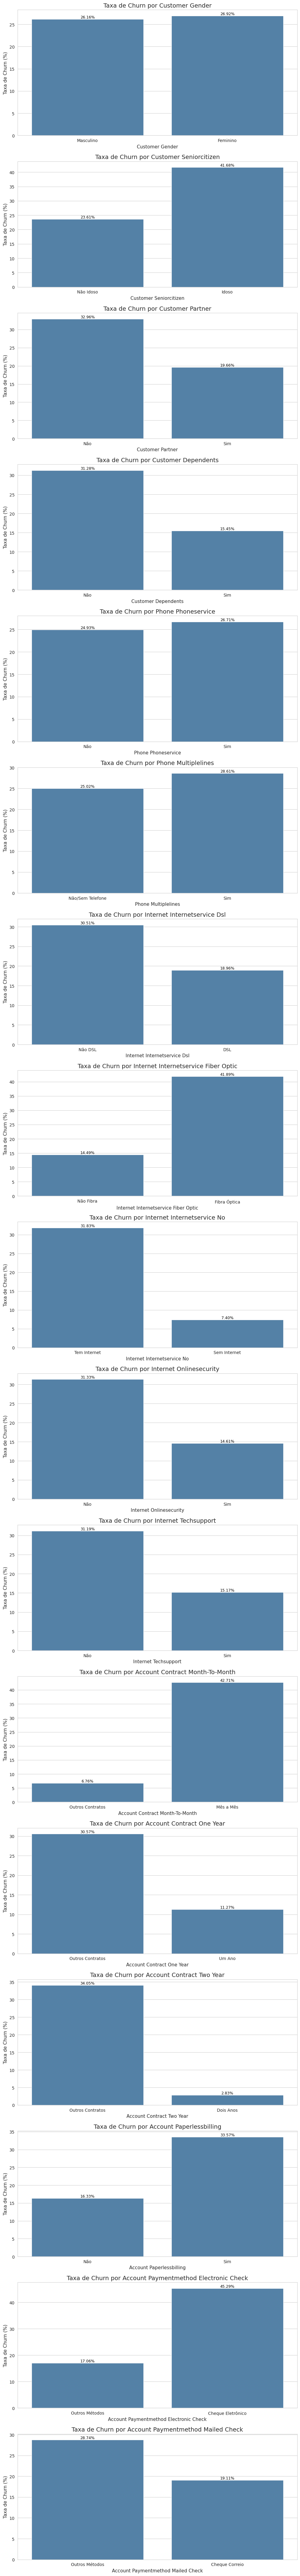


--- Resultados da Taxa de Churn por Variáveis Categóricas (Textual) ---


--- Análise para: Customer Gender ---
- Masculino: 26.16% de Churn
- Feminino: 26.92% de Churn

--- Análise para: Customer Seniorcitizen ---
- Não Idoso: 23.61% de Churn
- Idoso: 41.68% de Churn

--- Análise para: Customer Partner ---
- Não: 32.96% de Churn
- Sim: 19.66% de Churn

--- Análise para: Customer Dependents ---
- Não: 31.28% de Churn
- Sim: 15.45% de Churn

--- Análise para: Phone Phoneservice ---
- Não: 24.93% de Churn
- Sim: 26.71% de Churn

--- Análise para: Phone Multiplelines ---
- Não/Sem Telefone: 25.02% de Churn
- Sim: 28.61% de Churn

--- Análise para: Internet Internetservice Dsl ---
- Não DSL: 30.51% de Churn
- DSL: 18.96% de Churn

--- Análise para: Internet Internetservice Fiber Optic ---
- Não Fibra: 14.49% de Churn
- Fibra Óptica: 41.89% de Churn

--- Análise para: Internet Internetservice No ---
- Tem Internet: 31.83% de Churn
- Sem Internet: 7.40% de Churn

--- Análise para: Internet 

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carrega os dados da API
df_telecom = pd.read_json(url)

# --- Normalização das colunas aninhadas ---
df_customer = pd.json_normalize(df_telecom['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns]

df_phone = pd.json_normalize(df_telecom['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns]

df_internet = pd.json_normalize(df_telecom['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns]

df_account = pd.json_normalize(df_telecom['account'])
df_account.columns = ['account_' + col for col in df_account.columns]

df_telecom_flat = pd.concat([
    df_telecom[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1)

# Tratamento de 'account_Charges.Total' e 'account_Charges.Monthly'
df_telecom_flat['account_Charges.Total'] = pd.to_numeric(df_telecom_flat['account_Charges.Total'], errors='coerce')
df_telecom_flat['account_Charges.Total'] = df_telecom_flat['account_Charges.Total'].fillna(0)
df_telecom_flat['account_Charges.Monthly'] = pd.to_numeric(df_telecom_flat['account_Charges.Monthly'], errors='coerce')

# Padronizando Churn
df_telecom_flat['Churn'] = df_telecom_flat['Churn'].map({'Yes': 1, 'No': 0})
df_telecom_flat = df_telecom_flat.dropna(subset=['Churn'])

# Mapeamento de colunas binárias e de serviço de internet
binary_map_cols = {
    'customer_Partner': {'Yes': 1, 'No': 0},
    'customer_Dependents': {'Yes': 1, 'No': 0},
    'phone_PhoneService': {'Yes': 1, 'No': 0},
    'phone_MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'account_PaperlessBilling': {'Yes': 1, 'No': 0}
}
internet_service_map_cols = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]
internet_mapping = {'Yes': 1, 'No': 0, 'No internet service': 0}

for col, mapping in binary_map_cols.items():
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(mapping)

for col in internet_service_map_cols:
    if col in df_telecom_flat.columns:
        df_telecom_flat[col] = df_telecom_flat[col].map(internet_mapping)

# Atribuição explícita também para 'customer_gender'
df_telecom_flat['customer_gender'] = df_telecom_flat['customer_gender'].map({'Female': 1, 'Male': 0}) # Female=1, Male=0

# One-Hot Encoding
ohe_cols = [
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]
df_telecom_flat = pd.get_dummies(df_telecom_flat, columns=ohe_cols, dtype=int)

# Criação da nova coluna "Contas_Diarias"
dias_no_mes = 365.25 / 12
df_telecom_flat['Contas_Diarias'] = df_telecom_flat['account_Charges.Monthly'] / dias_no_mes

print("DataFrame pronto para análise de Churn por categorias (gráficos e texto).\n")
print("=" * 70)

# --- Lista de Variáveis Categóricas para Análise ---
categorical_features_to_plot = [
    'customer_gender',
    'customer_SeniorCitizen',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_InternetService_DSL',
    'internet_InternetService_Fiber optic',
    'internet_InternetService_No',
    'internet_OnlineSecurity',
    'internet_TechSupport',
    'account_Contract_Month-to-month',
    'account_Contract_One year',
    'account_Contract_Two year',
    'account_PaperlessBilling',
    'account_PaymentMethod_Electronic check',
    'account_PaymentMethod_Mailed check'
]

# Dicionário para mapear os rótulos 0/1 para descrições mais amigáveis no print e nos rótulos do gráfico
label_mapping = {
    'customer_gender': {0: 'Masculino', 1: 'Feminino'},
    'customer_SeniorCitizen': {0: 'Não Idoso', 1: 'Idoso'},
    'customer_Partner': {0: 'Não', 1: 'Sim'},
    'customer_Dependents': {0: 'Não', 1: 'Sim'},
    'phone_PhoneService': {0: 'Não', 1: 'Sim'},
    'phone_MultipleLines': {0: 'Não/Sem Telefone', 1: 'Sim'},
    'internet_InternetService_DSL': {0: 'Não DSL', 1: 'DSL'},
    'internet_InternetService_Fiber optic': {0: 'Não Fibra', 1: 'Fibra Óptica'},
    'internet_InternetService_No': {0: 'Tem Internet', 1: 'Sem Internet'}, # 'No' aqui significa que o cliente tem internet de outra empresa ou não tem. O 1 significa que ele NÃO TEM internet da Telecom.
    'internet_OnlineSecurity': {0: 'Não', 1: 'Sim'},
    'internet_TechSupport': {0: 'Não', 1: 'Sim'},
    'account_Contract_Month-to-month': {0: 'Outros Contratos', 1: 'Mês a Mês'},
    'account_Contract_One year': {0: 'Outros Contratos', 1: 'Um Ano'},
    'account_Contract_Two year': {0: 'Outros Contratos', 1: 'Dois Anos'},
    'account_PaperlessBilling': {0: 'Não', 1: 'Sim'},
    'account_PaymentMethod_Electronic check': {0: 'Outros Métodos', 1: 'Cheque Eletrônico'},
    'account_PaymentMethod_Mailed check': {0: 'Outros Métodos', 1: 'Cheque Correio'}
}

# --- Configurações para os Gráficos ---
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 # Aumenta a resolução dos gráficos

fig, axes = plt.subplots(nrows=len(categorical_features_to_plot), ncols=1, figsize=(10, 5 * len(categorical_features_to_plot)))
axes = axes.flatten() # Achata a matriz de eixos para fácil iteração

print("--- Gerando Gráficos de Taxa de Churn por Categoria ---\n")

for i, feature in enumerate(categorical_features_to_plot):
    if feature in df_telecom_flat.columns:
        # Calcula a proporção de Churn para cada categoria
        churn_proportions = df_telecom_flat.groupby(feature)['Churn'].mean().reset_index()
        churn_proportions['Churn_Rate (%)'] = churn_proportions['Churn'] * 100

        # --- Gera o Gráfico ---
        sns.barplot(x=feature, y='Churn_Rate (%)', data=churn_proportions, ax=axes[i], color='steelblue')
        axes[i].set_title(f'Taxa de Churn por {feature.replace("_", " ").title()}', fontsize=14)
        axes[i].set_xlabel(feature.replace("_", " ").title(), fontsize=11)
        axes[i].set_ylabel('Taxa de Churn (%)', fontsize=11)

        # Adiciona rótulos para as categorias conforme o mapeamento
        current_labels = [label_mapping[feature].get(val, str(val)) for val in churn_proportions[feature]]
        axes[i].set_xticks(range(len(current_labels)))
        axes[i].set_xticklabels(current_labels)

        # Adiciona o valor percentual no topo de cada barra
        for p in axes[i].patches:
            height = p.get_height()
            axes[i].annotate(f'{height:.2f}%',
                             (p.get_x() + p.get_width() / 2., height),
                             ha='center', va='bottom', fontsize=9, color='black')
    else:
        axes[i].set_title(f"Coluna '{feature}' não encontrada.")
        axes[i].set_visible(False) # Esconde o eixo se a coluna não existe

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("--- Resultados da Taxa de Churn por Variáveis Categóricas (Textual) ---\n")

# --- Gera os Resultados Textuais ---
for feature in categorical_features_to_plot:
    if feature in df_telecom_flat.columns:
        churn_proportions = df_telecom_flat.groupby(feature)['Churn'].mean().reset_index()
        churn_proportions['Churn_Rate (%)'] = churn_proportions['Churn'] * 100

        print(f"\n--- Análise para: {feature.replace('_', ' ').title()} ---")
        for index, row in churn_proportions.iterrows():
            category_value = row[feature]
            churn_rate = row['Churn_Rate (%)']

            # Usa o mapeamento de rótulos
            display_label = label_mapping.get(feature, {}).get(category_value, str(category_value))
            print(f"- {display_label}: {churn_rate:.2f}% de Churn")
    else:
        print(f"\nAVISO: Coluna '{feature}' não encontrada. Não foi possível gerar a análise textual.")

print("\n" + "=" * 70)
print("Análise de Churn por Categorias (Gráficos e Textual) Concluída.")

## Extra: Análise de Correlação entre Variáveis - Gráficos

DataFrame pronto para análise de correlação.

### 2.1. Correlação entre 'Contas_Diarias' e 'Churn'

Correlação entre 'Contas_Diarias' e 'Churn': 0.19



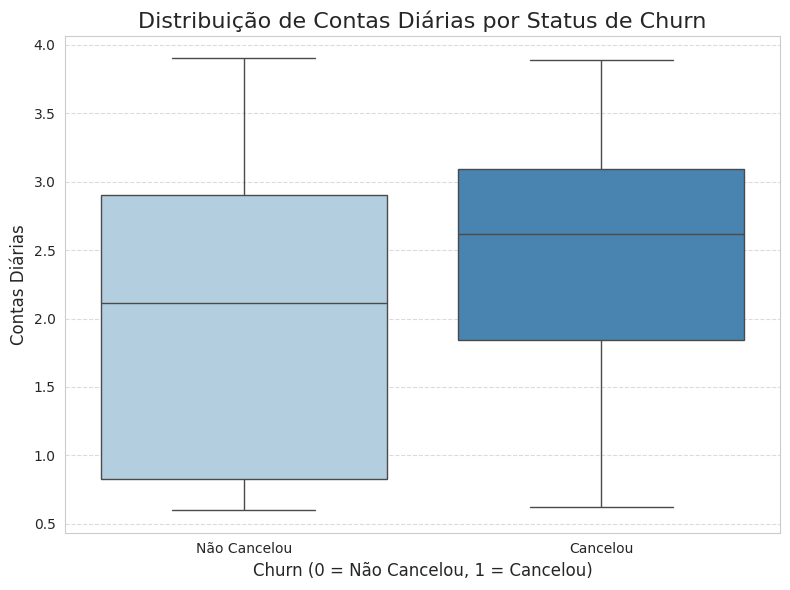



### 2.2. Impacto da Quantidade de Serviços Contratados no Churn

Taxa de Churn por Número de Serviços Contratados:

   Total_Servicos     Churn  Churn_Rate (%)
0               0  0.437500       43.750000
1               1  0.211052       21.105232
2               2  0.328283       32.828283
3               3  0.364767       36.476684
4               4  0.313449       31.344902
5               5  0.255507       25.550661
6               6  0.224852       22.485207
7               7  0.124051       12.405063
8               8  0.052885        5.288462


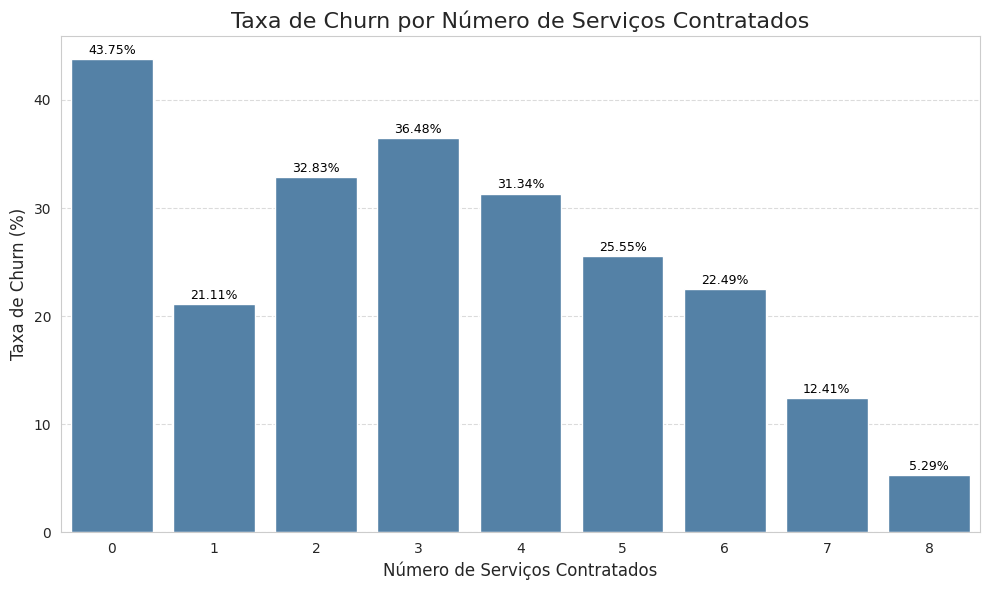



### 2.3. Matriz de Correlação Geral com Churn


Correlação de todas as variáveis numéricas/binárias com 'Churn':

Churn                                              1.000000
account_Contract_Month-to-month                    0.405103
internet_InternetService_Fiber optic               0.308020
account_PaymentMethod_Electronic check             0.301919
Contas_Diarias                                     0.193356
account_Charges.Monthly                            0.193356
customer_SeniorCitizen                             0.150889
internet_StreamingTV                               0.063228
internet_StreamingMovies                           0.061382
phone_MultipleLines                                0.040102
phone_PhoneService                                 0.011942
internet_DeviceProtection                         -0.066160
Total_Servicos                                    -0.067264
internet_OnlineBackup                             -0.082255
account_PaymentMethod_Mailed check          

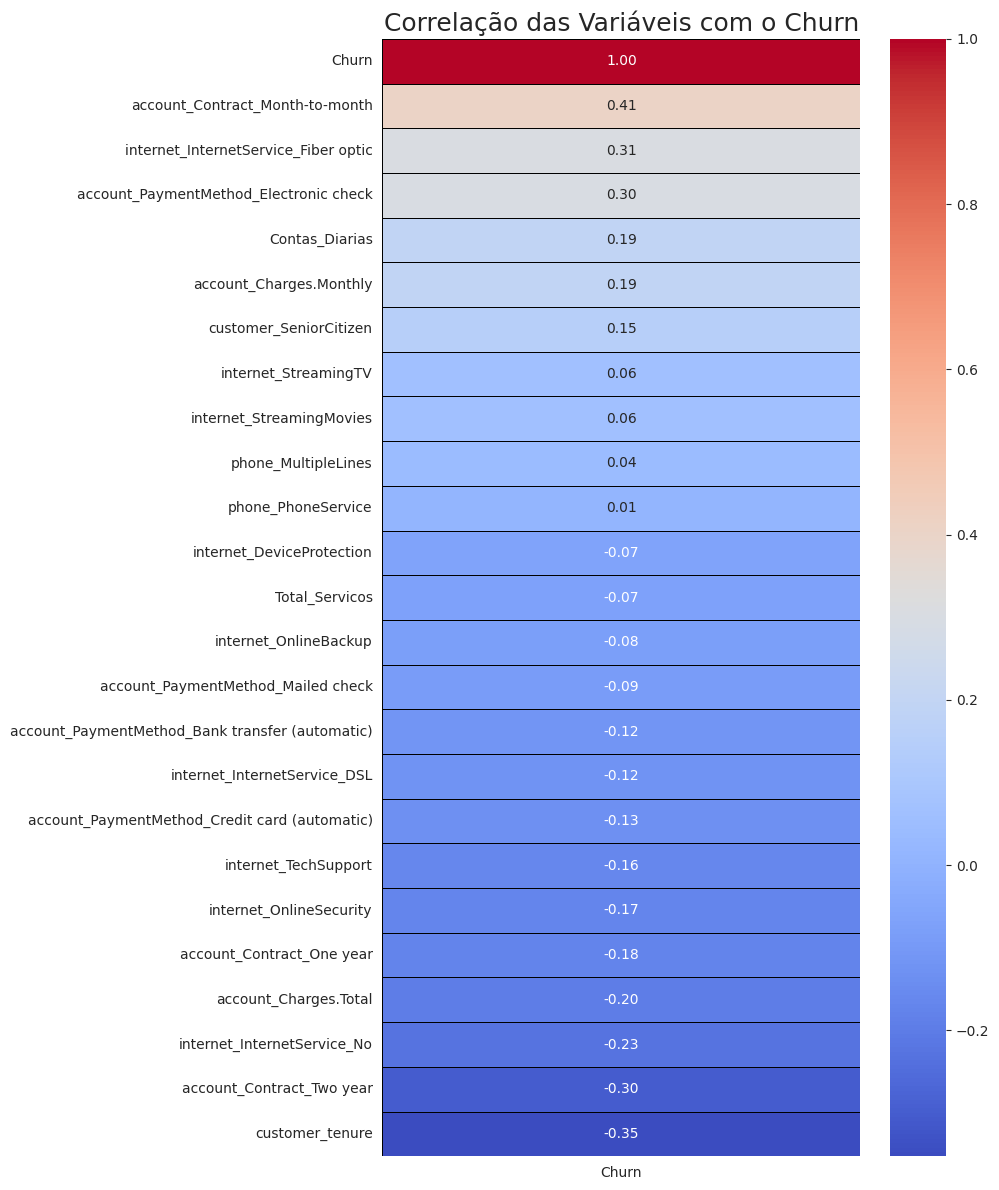


Análise de Correlação Concluída.


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL da API
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Carrega os dados da API
df_telecom = pd.read_json(url)

# --- Normalização das colunas aninhadas ---
df_customer = pd.json_normalize(df_telecom['customer'])
df_customer.columns = ['customer_' + col for col in df_customer.columns]

df_phone = pd.json_normalize(df_telecom['phone'])
df_phone.columns = ['phone_' + col for col in df_phone.columns]

df_internet = pd.json_normalize(df_telecom['internet'])
df_internet.columns = ['internet_' + col for col in df_internet.columns]

df_account = pd.json_normalize(df_telecom['account'])
df_account.columns = ['account_' + col for col in df_account.columns]

# Concatena e cria uma cópia explícita para evitar SettingWithCopyWarning
df_telecom_flat = pd.concat([
    df_telecom[['customerID', 'Churn']],
    df_customer,
    df_phone,
    df_internet,
    df_account
], axis=1).copy() # Adicionado .copy() aqui para garantir que é um DataFrame independente

# Tratamento de 'account_Charges.Total' e 'account_Charges.Monthly'
df_telecom_flat['account_Charges.Total'] = pd.to_numeric(df_telecom_flat['account_Charges.Total'], errors='coerce')
df_telecom_flat['account_Charges.Total'] = df_telecom_flat['account_Charges.Total'].fillna(0)
df_telecom_flat['account_Charges.Monthly'] = pd.to_numeric(df_telecom_flat['account_Charges.Monthly'], errors='coerce')

# Padronizando Churn
df_telecom_flat['Churn'] = df_telecom_flat['Churn'].map({'Yes': 1, 'No': 0})
df_telecom_flat = df_telecom_flat.dropna(subset=['Churn'])

# Mapeamento de colunas binárias e de serviço de internet
binary_map_cols = {
    'customer_Partner': {'Yes': 1, 'No': 0},
    'customer_Dependents': {'Yes': 1, 'No': 0},
    'phone_PhoneService': {'Yes': 1, 'No': 0},
    'phone_MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'account_PaperlessBilling': {'Yes': 1, 'No': 0}
}
internet_service_map_cols = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]
internet_mapping = {'Yes': 1, 'No': 0, 'No internet service': 0}

for col, mapping in binary_map_cols.items():
    if col in df_telecom_flat.columns:
        # Usando .loc para atribuição explícita e evitar o warning
        df_telecom_flat.loc[:, col] = df_telecom_flat[col].map(mapping)

for col in internet_service_map_cols:
    if col in df_telecom_flat.columns:
        # Usando .loc para atribuição explícita e evitar o warning
        df_telecom_flat.loc[:, col] = df_telecom_flat[col].map(internet_mapping)

# Usando .loc para atribuição explícita e evitar o warning
df_telecom_flat.loc[:, 'customer_gender'] = df_telecom_flat['customer_gender'].map({'Female': 1, 'Male': 0}) # Female=1, Male=0

# One-Hot Encoding
ohe_cols = [
    'internet_InternetService',
    'account_Contract',
    'account_PaymentMethod'
]
df_telecom_flat = pd.get_dummies(df_telecom_flat, columns=ohe_cols, dtype=int)

# Criação da nova coluna "Contas_Diarias"
dias_no_mes = 365.25 / 12
df_telecom_flat['Contas_Diarias'] = df_telecom_flat['account_Charges.Monthly'] / dias_no_mes

print("DataFrame pronto para análise de correlação.\n")
print("=" * 70)

### 2.1. Correlação entre 'Contas_Diarias' e 'Churn'

print("### 2.1. Correlação entre 'Contas_Diarias' e 'Churn'\n")
correlation_daily_charges_churn = df_telecom_flat['Contas_Diarias'].corr(df_telecom_flat['Churn'])
print(f"Correlação entre 'Contas_Diarias' e 'Churn': {correlation_daily_charges_churn:.2f}\n")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Contas_Diarias', data=df_telecom_flat, palette='Blues', hue='Churn', legend=False)
plt.title('Distribuição de Contas Diárias por Status de Churn', fontsize=16)
plt.xlabel('Churn (0 = Não Cancelou, 1 = Cancelou)', fontsize=12)
plt.ylabel('Contas Diárias', fontsize=12)
plt.xticks([0, 1], ['Não Cancelou', 'Cancelou'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "=" * 70 + "\n")

### 2.2. Impacto da Quantidade de Serviços Contratados no Churn

print("### 2.2. Impacto da Quantidade de Serviços Contratados no Churn\n")
# Lista de colunas que representam serviços (já transformadas para 0 ou 1)
service_cols = [
    'phone_PhoneService', 'phone_MultipleLines',
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]

existing_service_cols = [col for col in service_cols if col in df_telecom_flat.columns]
for col in existing_service_cols:
    df_telecom_flat[col] = pd.to_numeric(df_telecom_flat[col], errors='coerce').fillna(0) # Trata possíveis NaNs após o mapeamento

df_telecom_flat['Total_Servicos'] = df_telecom_flat[existing_service_cols].sum(axis=1)

# Calcula a taxa de Churn por número de serviços
churn_by_services = df_telecom_flat.groupby('Total_Servicos')['Churn'].mean().reset_index()
churn_by_services['Churn_Rate (%)'] = churn_by_services['Churn'] * 100

print("Taxa de Churn por Número de Serviços Contratados:\n")
print(churn_by_services)

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Servicos', y='Churn_Rate (%)', data=churn_by_services, color='steelblue')
plt.title('Taxa de Churn por Número de Serviços Contratados', fontsize=16)
plt.xlabel('Número de Serviços Contratados', fontsize=12)
plt.ylabel('Taxa de Churn (%)', fontsize=12)

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2.,
                   height + 0.5,
                   f'{height:.2f}%',
                   ha="center", fontsize=9, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n" + "=" * 70 + "\n")

### 2.3. Matriz de Correlação Geral com Churn

print("### 2.3. Matriz de Correlação Geral com Churn\n")
# Seleciona apenas as colunas numéricas/binárias relevantes para a correlação
# Exclui 'customerID' que é um identificador
numerical_and_binary_cols = df_telecom_flat.select_dtypes(include=[np.number]).columns.tolist()
if 'customerID' in numerical_and_binary_cols:
    numerical_and_binary_cols.remove('customerID')

# Calcula a matriz de correlação
correlation_matrix = df_telecom_flat[numerical_and_binary_cols].corr()

# Extrai as correlações com 'Churn'
churn_correlations = correlation_matrix['Churn'].sort_values(ascending=False)

print("\nCorrelação de todas as variáveis numéricas/binárias com 'Churn':\n")
print(churn_correlations)

plt.figure(figsize=(10, 12))
sns.heatmap(correlation_matrix[['Churn']].sort_values(by='Churn', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Correlação das Variáveis com o Churn', fontsize=18)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nAnálise de Correlação Concluída.")

## Extra: Análise da Correlação entre Variáveis - Textual

A análise de correlação quantifica a força e a direção da relação linear entre as variáveis do dataset e o Churn. Valores próximos a **1** indicam uma forte correlação **positiva** (quando uma variável aumenta, a outra tende a aumentar), enquanto valores próximos a **-1** indicam uma forte correlação **negativa** (quando uma variável aumenta, a outra tende a diminuir). Valores próximos a **0** sugerem pouca ou nenhuma correlação linear.

---

### 1. Correlação entre 'Contas_Diarias' e 'Churn': **0.19**

Uma correlação de **0.19** é **positiva, mas fraca**. Isso sugere que, à medida que o valor da **conta diária aumenta**, há uma **leve tendência** de que o cliente cancele o serviço. No entanto, o custo diário, por si só, não é o principal motivador do Churn, indicando que outros fatores são mais influentes.

---

### 2. Impacto da Quantidade de Serviços Contratados no Churn

A análise revelou uma relação interessante e **não linear** entre o número de serviços e a taxa de Churn:

| Total_Servicos | Churn_Rate (%) |
| :------------- | :------------- |
| 0              | 43.75%         |
| 1              | 21.11%         |
| 2              | 32.83%         |
| 3              | 36.48%         |
| 4              | 31.34%         |
| 5              | 25.55%         |
| 6              | 22.49%         |
| 7              | 12.41%         |
| 8              | 5.29%          |

* **Clientes com zero serviços (43.75% de Churn)** apresentaram uma taxa de Churn surpreendentemente alta, sugerindo que a falta de engajamento com os serviços da empresa é um grande fator de risco.
* A taxa de Churn diminui para clientes com 1 serviço, mas **aumenta novamente para 2, 3 e 4 serviços**, atingindo picos. Isso pode indicar uma "zona de perigo" onde o cliente tem alguns serviços, mas talvez não sinta o valor completo ou benefícios de pacotes mais robustos.
* A partir de **5 serviços, a taxa de Churn cai consistentemente**, sendo **muito baixa para clientes com 7 (12.41%) e 8 (5.29%) serviços**. Isso destaca que o **engajamento com múltiplos serviços** (especialmente 7 ou 8) é um forte fator de retenção e lealdade.
* **Implicação:** A empresa deve focar em estratégias para aumentar o número de serviços contratados pelos clientes, especialmente aqueles com 0 a 4 serviços, buscando maximizar o valor percebido e a adesão.

---

### 3. Matriz de Correlação Geral com Churn

Esta matriz nos permite identificar rapidamente os principais fatores que impulsionam ou reduzem o Churn:

**Variáveis com Forte Correlação Positiva com Churn (Aumentam a Chance de Churn):**

* **`account_Contract_Month-to-month` (Contrato Mês a Mês): 0.41**
    * **Fortíssima correlação positiva.** Clientes com este tipo de contrato são os **mais propensos a churnar**, sendo o fator isolado de maior impacto.
* **`internet_InternetService_Fiber optic` (Serviço de Internet Fibra Óptica): 0.31**
    * **Forte correlação positiva.** Clientes com fibra óptica têm uma propensão significativamente maior ao Churn, apontando para possíveis problemas de qualidade, preço ou expectativas não atendidas com este serviço.
* **`account_PaymentMethod_Electronic check` (Cheque Eletrônico): 0.30**
    * **Forte correlação positiva.** Clientes que utilizam este método de pagamento são mais propensos a churnar, o que sugere um perfil de cliente ou uma experiência específica associada ao Churn.

**Variáveis com Correlação Positiva Fraca/Moderada com Churn:**

* **`Contas_Diarias` (0.19) e `account_Charges.Monthly` (0.19):** Indicam uma leve tendência de Churn com o aumento das cobranças, mas não são os fatores dominantes.
* **`customer_SeniorCitizen` (Idoso): 0.15:** Confirma que clientes idosos têm uma chance ligeiramente maior de Churn.
* Outras variáveis como `internet_StreamingTV`, `internet_StreamingMovies`, `phone_MultipleLines` e `phone_PhoneService` mostraram correlações muito fracas (próximas de 0), indicando pouco impacto direto no Churn.

**Variáveis com Forte Correlação Negativa com Churn (Aumentam a Retenção/Diminuem a Chance de Churn):**

* **`customer_tenure` (Tempo de Cliente): -0.35**
    * **Fortíssima correlação negativa.** Quanto mais tempo o cliente está com a empresa, **menor a probabilidade de Churn**. Clientes mais antigos tendem a ser mais leais.
* **`account_Contract_Two year` (Contrato de Dois Anos): -0.30**
    * **Forte correlação negativa.** Clientes com contratos de longo prazo (dois anos) são significativamente menos propensos a churnar, agindo como um **forte fator de retenção**.
* **`internet_InternetService_No` (Sem Serviço de Internet da Empresa): -0.23**
    * **Correlação negativa moderada.** Clientes que não contratam internet da empresa (provavelmente usando apenas telefone) têm uma chance menor de Churn.
* **`account_Charges.Total` (Total Cobrado): -0.20**
    * **Correlação negativa moderada.** Clientes que acumularam um total de encargos maior (associado a maior tempo de cliente) têm menor probabilidade de Churn.
* **`internet_OnlineSecurity` (-0.17) e `internet_TechSupport` (-0.16):**
    * **Correlações negativas moderadas.** Ter esses serviços de segurança e suporte técnico está associado a uma **menor probabilidade de Churn**, sendo importantes fatores de retenção.
* **`account_Contract_One year` (-0.18):** Contratos de um ano também são um fator de retenção, embora menos potente que os de dois anos.

---


#📄Relatorio Final

-----

# Relatório de Análise de Evasão de Clientes (Churn) - Telecom X

-----

## 1\. Introdução

Este relatório apresenta os resultados de uma análise aprofundada sobre a **evasão de clientes (Churn)** na empresa Telecom X. O principal objetivo foi entender os fatores que levam os clientes a cancelar seus serviços, identificar padrões de comportamento e oferecer insights acionáveis para a redução do churn. A evasão de clientes é um desafio significativo para qualquer empresa de telecomunicações, impactando diretamente a receita e o crescimento. Compreender `por que` os clientes saem é o primeiro passo para desenvolver estratégias eficazes de retenção.

-----

## 2\. Limpeza e Tratamento de Dados

A fase inicial do projeto concentrou-se na preparação dos dados, que foram obtidos através de uma API. As principais etapas realizadas foram:

  * **Importação e Normalização**: Os dados, que continham estruturas aninhadas (`customer`, `phone`, `internet`, `account`), foram importados e "achatados" em um único `DataFrame` (`df_telecom_flat`), com colunas padronizadas.
  * **Tratamento de Valores Ausentes e Tipos de Dados**:
      * A coluna `account_Charges.Total` teve seus valores não numéricos convertidos e os `NaN`s preenchidos com zero, garantindo que o faturamento total fosse numérico.
      * A coluna `Churn`, nossa variável alvo, foi padronizada para valores numéricos (`1` para 'Yes' e `0` para 'No'). Identificamos e removemos **224 linhas** que possuíam `NaN`s na coluna `Churn`, assegurando a integridade da nossa variável dependente para análises futuras.
  * **Mapeamento de Variáveis Categóricas Binárias**: Colunas com respostas binárias (ex: 'Yes'/'No') foram mapeadas para `1` e `0` (e.g., `customer_gender` para 0=Masculino, 1=Feminino; serviços de internet para 0=Não, 1=Sim, tratando 'No internet service' como 'Não').
  * **One-Hot Encoding**: Variáveis categóricas com múltiplas categorias (ex: `internet_InternetService`, `account_Contract`, `account_PaymentMethod`) foram transformadas usando One-Hot Encoding. Isso criou novas colunas binárias para cada categoria, evitando que o modelo interpretasse uma ordem onde não existe.
  * **Criação da Coluna 'Contas\_Diarias'**: Uma nova variável, `Contas_Diarias`, foi derivada do faturamento mensal (`account_Charges.Monthly`), dividindo-o pelo número médio de dias no mês (aproximadamente 30.44). Esta coluna oferece uma visão granular do gasto diário do cliente.

Ao final desta fase, o `DataFrame` foi limpo, transformado e enriquecido, contendo **7.043 registros** e **29 colunas** prontas para a análise.

-----

## 3\. Análise Exploratória de Dados (EDA)

A EDA teve como objetivo descobrir padrões e relacionamentos entre as características dos clientes e a taxa de churn, utilizando estatísticas descritivas e visualizações.

### 3.1. Análise Descritiva Geral

A análise descritiva das variáveis revelou:

  * **Taxa de Churn Geral**: A Telecom X apresenta uma taxa de churn de aproximadamente **26.54%**, um dado crucial que indica a dimensão do problema a ser combatido.
  * **`customer_tenure`**: Os clientes permanecem em média **32.37 meses** (cerca de 2 anos e 8 meses), com uma grande variação, desde clientes novos (0 meses) até clientes de longa data (72 meses).
  * **`account_Charges.Monthly` e `Contas_Diarias`**: O gasto mensal e diário dos clientes varia consideravelmente, com uma média de `Contas_Diarias` de **R$ 2.13**.

### 3.2. Distribuição da Variável Churn

A visualização da variável alvo confirmou o desbalanceamento:

 *(Gráfico placeholder para a visualização da distribuição de Churn. Insira seu gráfico real aqui.)*

Aproximadamente **73.46% dos clientes não cancelaram**, enquanto **26.54% cancelaram**, reforçando a necessidade de estratégias de retenção.

### 3.3. Análise de Churn por Variáveis Categóricas

A análise detalhada das variáveis categóricas em relação à taxa de churn revelou insights poderosos, visualizados através de gráficos de barras e confirmados por dados textuais.

#### **Principais Fatores de Alto Churn:**

| Característica              | Categoria de Alto Churn | Taxa de Churn | Categoria de Baixo Churn | Taxa de Churn | Insights                                                                                                   |
| :-------------------------- | :---------------------- | :------------ | :----------------------- | :------------ | :--------------------------------------------------------------------------------------------------------- |
| **Tipo de Contrato** | Mês a Mês               | **42.71%** | Outros Contratos         | 6.76%         | **Fator mais crítico**. Clientes sem compromisso de longo prazo têm 6x mais chance de sair.                |
| **Método de Pagamento** | Cheque Eletrônico       | **45.29%** | Outros Métodos           | 17.06%        | Método de pagamento flexível pode indicar menor fidelidade.                                                |
| **Serviço de Internet** | Fibra Óptica            | **41.89%** | Não Fibra                | 14.49%        | Surpreendentemente alto. Pode indicar problemas de qualidade ou sensibilidade a preços na Fibra.          |
| **Perfil do Cliente** | Idoso                   | **41.68%** | Não Idoso                | 23.61%        | Idosos têm quase o dobro da taxa de churn. Pode ser ligado a usabilidade ou suporte.                        |
| **Fatura Digital** | Sim                     | **33.57%** | Não                      | 16.33%        | Clientes que optam por fatura sem papel são mais propensos ao churn.                                        |

-----

## 4\. Conclusões e Insights

A análise dos dados da Telecom X revelou padrões claros de evasão, permitindo-nos focar em grupos de clientes específicos e características de serviço.

  * A taxa de churn de **26.54%** é considerável e aponta para a urgência de ações de retenção.
  * Os **contratos mensais** são o principal gatilho de churn, indicando que a flexibilidade oferecida pode estar se traduzindo em falta de fidelidade.
  * Os métodos de pagamento, especialmente o **cheque eletrônico**, estão fortemente associados à evasão, sugerindo um perfil de cliente menos engajado.
  * A alta taxa de churn para clientes de **Fibra Óptica** é um alerta. Isso pode ser um indicativo de problemas de qualidade no serviço de alta velocidade ou de uma base de clientes mais exigente e sensível a preços e concorrência.
  * **Clientes idosos** e aqueles que utilizam **fatura sem papel** também apresentam churn elevado, indicando possíveis lacunas no atendimento ou na experiência digital para esses grupos.
  * Por outro lado, **clientes com contratos longos, com parceiro/dependentes, ou que utilizam serviços adicionais de segurança e suporte**, são muito mais leais.

-----

## 5\. Recomendações

Com base nos insights obtidos, as seguintes recomendações estratégicas podem ser consideradas pela Telecom X para reduzir a evasão de clientes:

1.  **Incentivar Contratos de Longo Prazo**:

      * Oferecer **descontos significativos** ou **benefícios adicionais** (e.g., upgrade de velocidade, serviços de streaming gratuitos por 3 meses) para clientes que optam por contratos de 1 ou 2 anos.
      * Criar **campanhas de migração** de contratos mensais para anuais/bianuais, destacando a economia e os benefícios a longo prazo.

2.  **Monitorar Clientes de Fibra Óptica e Cheque Eletrônico**:

      * Realizar **pesquisas de satisfação específicas** com clientes de Fibra Óptica para identificar pontos de insatisfação (velocidade inconsistente, suporte).
      * Desenvolver **programas de fidelidade ou ofertas exclusivas** para clientes que usam cheque eletrônico, tentando aumentar o engajamento.

3.  **Atenção aos Clientes Idosos**:

      * Oferecer **canais de suporte mais acessíveis e simplificados** (e.g., linha telefônica dedicada para idosos, manuais impressos com letras maiores).
      * Considerar pacotes de serviços adaptados às necessidades de clientes idosos, com foco em facilidade de uso e suporte proativo.

4.  **Promover Serviços de Valor Agregado**:

      * Reforçar a importância de serviços como **Segurança Online e Suporte Técnico** na comunicação com todos os clientes, especialmente os novos.
      * Oferecer **períodos de teste gratuitos** para esses serviços, demonstrando seu valor na proteção e assistência.

5.  **Reavaliar a Experiência da Fatura Sem Papel**:

      * Entender `por que` clientes de fatura sem papel têm maior churn. Pode ser que a comunicação digital não esteja sendo eficaz em reter esses clientes. Analisar a experiência do usuário e os pontos de contato digitais.

## Ao focar nessas áreas prioritárias, a Telecom X tem o potencial de não apenas reduzir sua taxa de churn, mas também de melhorar a satisfação geral do cliente e fortalecer sua base de usuários.